In [14]:
from music21 import *
from IPython.display import Image


def music(info: list, notes: str, midi=False):
    s = stream.Score()
    part = stream.Part()
    if info[0] == "Treble":
        part.append(clef.TrebleClef())
    elif info[0] == "Bass":
        part.append(clef.BassClef)
    elif info[0] == "None":
        part.append(clef.NoClef())
    part.append(key.KeySignature(info[1]))
    part.append(meter.TimeSignature(info[2]))

    split_notes = notes.split(" ")
    for n in split_notes:
        if n[0] == "!":
            part.append(harmony.ChordSymbol(n[1:]))
        elif n == "^":
            part.append(layout.SystemLayout(isNew=True))
        else:
            is_chord = False
            is_tie = "none"
            note_and_length = n.split("/")
            if "(" in note_and_length[0]:
                is_chord = True
                chord_name = (
                    note_and_length[0].replace("(", "").replace(")", "").split("$")
                )
            else:
                note_name = note_and_length[0]
            if "{" in note_and_length[1]:
                is_tie = "start"
                note_and_length[1] = note_and_length[1].replace("{", "")
            if "}" in note_and_length[1]:
                is_tie = "stop"
                note_and_length[1] = note_and_length[1].replace("}", "")
            if "*" in note_and_length[1]:
                length_and_col = note_and_length[1].split("*")
                note_length = length_and_col[0]
                note_col = length_and_col[1]
            else:
                note_length = note_and_length[1]
                note_col = ""
            if note_length in ["0.3", ".3"]:
                note_length = 0.333333333
            else:
                note_length = float(note_length)
            if is_chord:
                add_n = chord.Chord(chord_name, quarterLength=note_length)
            else:
                if note_name.lower() == "r":
                    add_n = note.Rest(quarterLength=note_length)
                else:
                    add_n = note.Note(note_name, quarterLength=note_length)
            if is_tie != "none":
                add_n.tie = tie.Tie(is_tie)
            if note_col != "":
                add_n.style.color = note_col

            part.append(add_n)

    s.append(part)
    if midi:
        return s.show("midi")
    else:
        return Image(filename=s.write("musicxml.png"))

# Coltrane:<br>A Player's Guide to His Harmony
by Walt Weiskopf and Ramon Ricker

EXAMPLE I. TYPICAL CHORD PROGRESSION


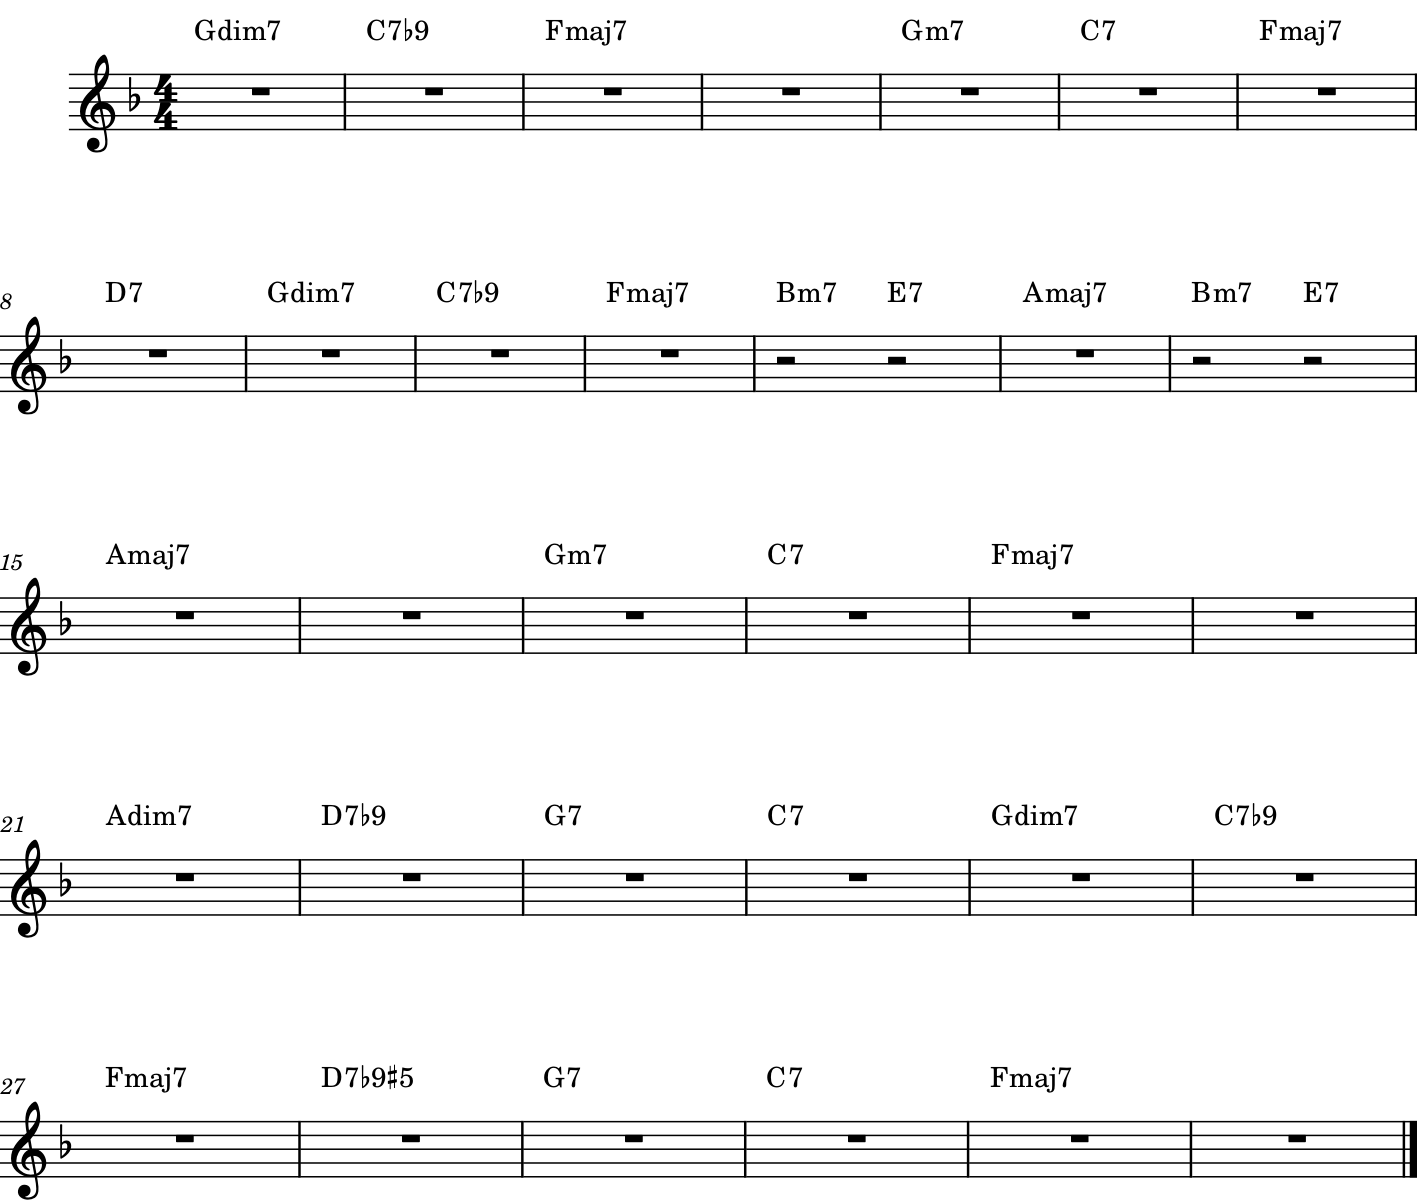

In [21]:
info = ["Treble", -1, "4/4"]
notes = "!gdim7 r/4 !c7b9 r/4 !fmaj7 r/4 r/4 !gm7 r/4 !c7 r/4 !fmaj7 r/4 ^ "
notes += "!d7 r/4 !gdim7 r/4 !c7b9 r/4 !fmaj7 r/4 !bm7 r/2 !e7 r/2 !amaj7 r/4 !bm7 r/2 !e7 r/2 ^ "
notes += "!amaj7 r/4 r/4 !gm7 r/4 !c7 r/4 !fmaj7 r/4 r/4 ^ "
notes += "!adim7 r/4 !d7b9 r/4 !g7 r/4 !c7 r/4 !gdim7 r/4 !c7b9 r/4 ^ "
notes += "!fmaj7 r/4 !d7b9#5 r/4 !g7 r/4 !c7 r/4 !fmaj7 r/4 r/4"
print("EXAMPLE I. TYPICAL CHORD PROGRESSION")
music(info, notes, True)
music(info, notes, False)